In [135]:
%load_ext autoreload
%autoreload 2
from methods2final import * 

sc.settings.verbosity = 3  
sc.logging.print_versions()
results_file = './write/pfc2018.h5ad'
sc.settings.set_figure_params(dpi=160)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
scanpy==1.4.1 anndata==0.6.19 numpy==1.15.4 scipy==1.1.0 pandas==0.23.4 scikit-learn==0.20.1 statsmodels==0.9.0 


## Data preprocessing

In [73]:
# Transepose the expression matrix to gene as rows and cells as columns
df = pd.read_csv("../dat/GSE104276_all_pfc_2394_UMI_TPM_NOERCC.csv")
exp_mat = df.transpose()
exp_mat.to_csv("../dat/GSE104276_all_pfc_2394_UMI_TPM_NOERCC_exp_mat.csv")

In [74]:
exp_mat.head()

,0,1,2,3,4,5,6,7,8,9,...,24143,24144,24145,24146,24147,24148,24149,24150,24151,24152
GENE,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
GW08_PFC1_sc1,4.54,0,0,4.54,0,0,0,0,4.54,0,...,4.54,4.54,0,0,45.4,0,4.54,0,0,0
GW08_PFC1_sc2,0,0,0,0,0,0,0,0,0,0,...,0,81.19,0,0,0,0,108.25,0,0,0
GW08_PFC1_sc3,0,0,0,8.87,0,0,0,0,0,0,...,124.25,0,0,0,0,0,8.87,124.25,0,35.5
GW08_PFC1_sc4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,189.05,0,0,0,0,0,0


In [76]:
adata = sc.read_csv('../dat/GSE104276_all_pfc_2394_UMI_TPM_NOERCC_exp_mat.csv', delimiter=',')
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


filtered out 2 cells that have less than 1 counts


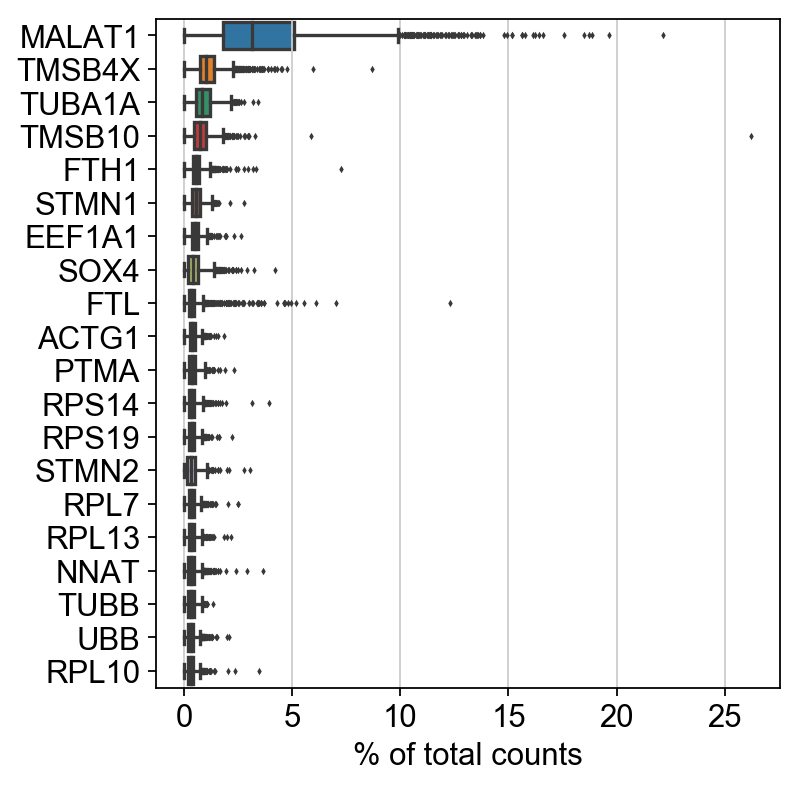

In [77]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [79]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 16 cells that have less than 200 genes expressed
filtered out 3887 genes that are detected in less than 3 cells


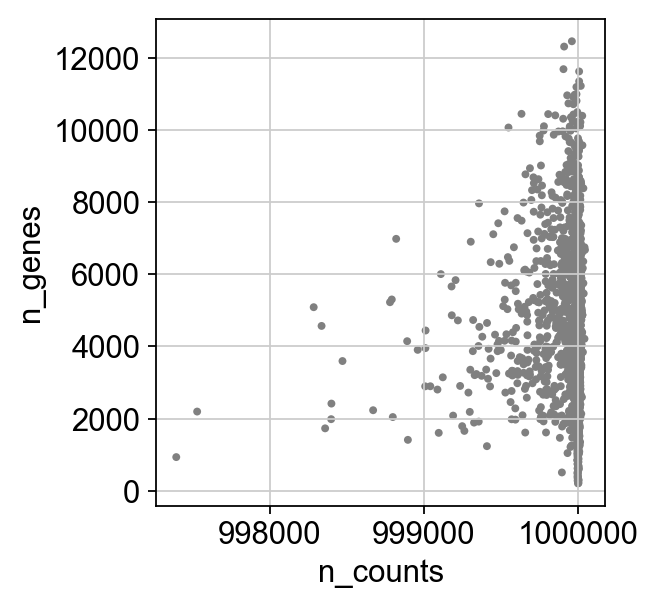

In [82]:
mito_genes = adata.var_names.str.startswith('MT-')
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['percent_mito'] = np.sum(
    adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1)
sc.pl.scatter(adata, x='n_counts', y='n_genes')

In [83]:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)
sc.pp.log1p(adata)

In [84]:
adata.raw = adata

In [85]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


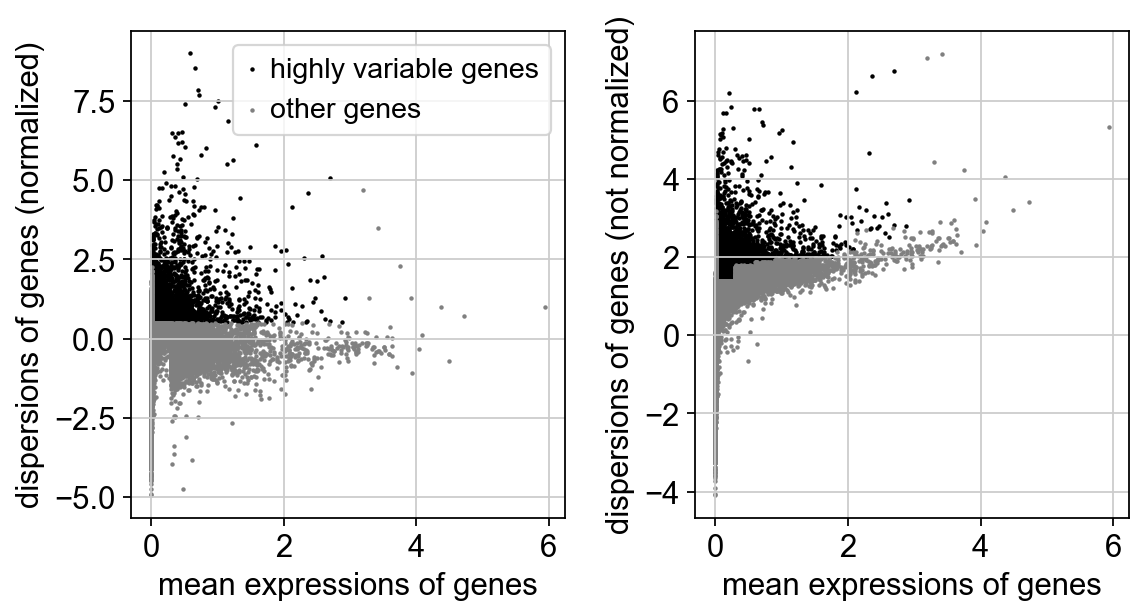

In [86]:
sc.pl.highly_variable_genes(adata)

In [87]:
adata = adata[:, adata.var['highly_variable']]

In [89]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA on highly variable genes


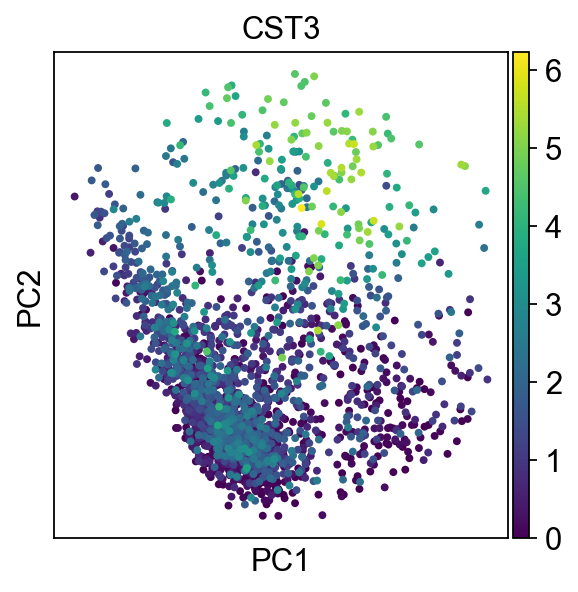

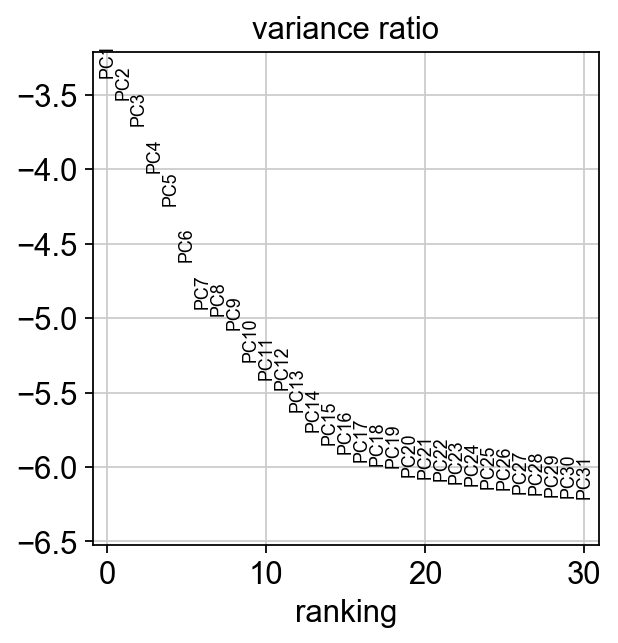

In [91]:
sc.pl.pca(adata, color='CST3')
sc.pl.pca_variance_ratio(adata, log=True)

In [92]:
adata.write(results_file)

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE with a fix by D. DeTomaso
    finished (0:00:15.18) --> added
    'X_tsne', tSNE coordinates (adata.obsm)


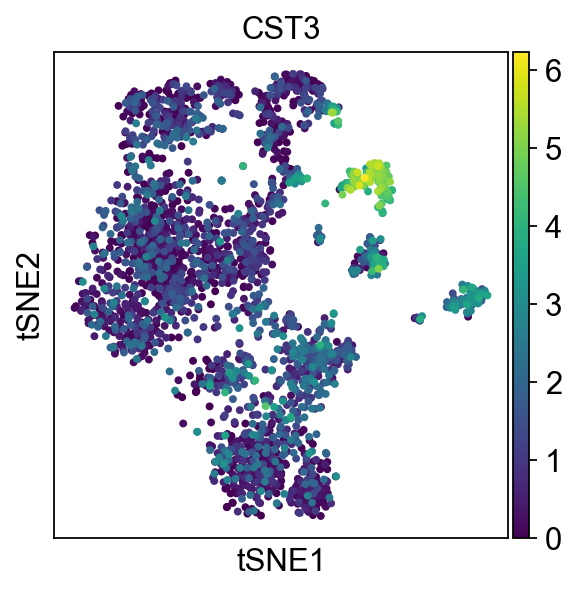

In [95]:
sc.tl.tsne(adata)
sc.pl.tsne(adata, color='CST3')

In [96]:
adata

AnnData object with n_obs × n_vars = 2378 × 4490 
    obs: 'n_genes', 'percent_mito', 'n_counts'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'pca'
    obsm: 'X_pca', 'X_tsne'
    varm: 'PCs'

In [99]:
adata.obs.index

Index(['GW08_PFC1_sc1', 'GW08_PFC1_sc2', 'GW08_PFC1_sc3', 'GW08_PFC1_sc4',
       'GW08_PFC1_sc5', 'GW08_PFC1_sc6', 'GW08_PFC1_sc7', 'GW08_PFC1_sc8',
       'GW08_PFC1_sc9', 'GW08_PFC1_sc11',
       ...
       'GW23_PFC2_SF2_F25_sc41', 'GW23_PFC2_SF2_F25_sc42',
       'GW23_PFC2_SF2_F25_sc43', 'GW23_PFC2_SF2_F25_sc44',
       'GW23_PFC2_SF2_F25_sc45', 'GW23_PFC2_SF2_F25_sc46',
       'GW23_PFC2_SF2_F25_sc47', 'GW23_PFC2_SF2_F25_sc48',
       'GW23_PFC2_SF2_F25_sc49', 'GW23_PFC2_SF2_F25_sc50'],
      dtype='object', length=2378)

In [104]:
adata.obs["week"] = adata.obs.apply(lambda row:row["ID"].split("_")[0], axis=1)

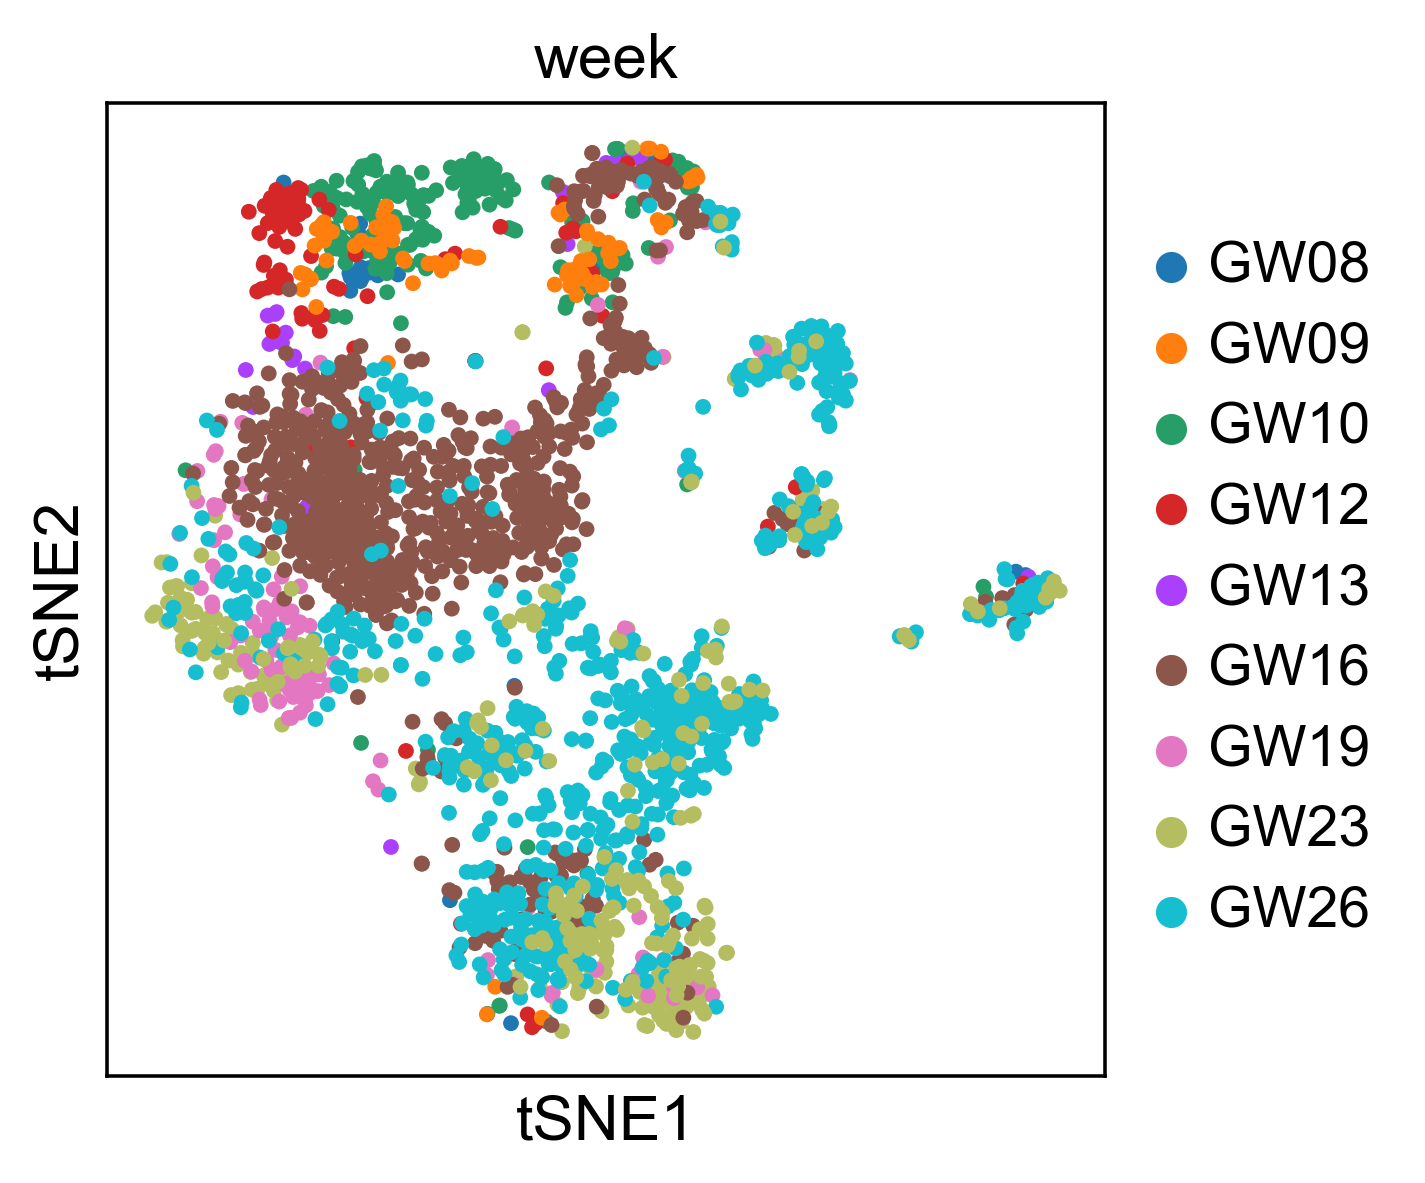

In [121]:
sc.pl.tsne(adata, color='week')

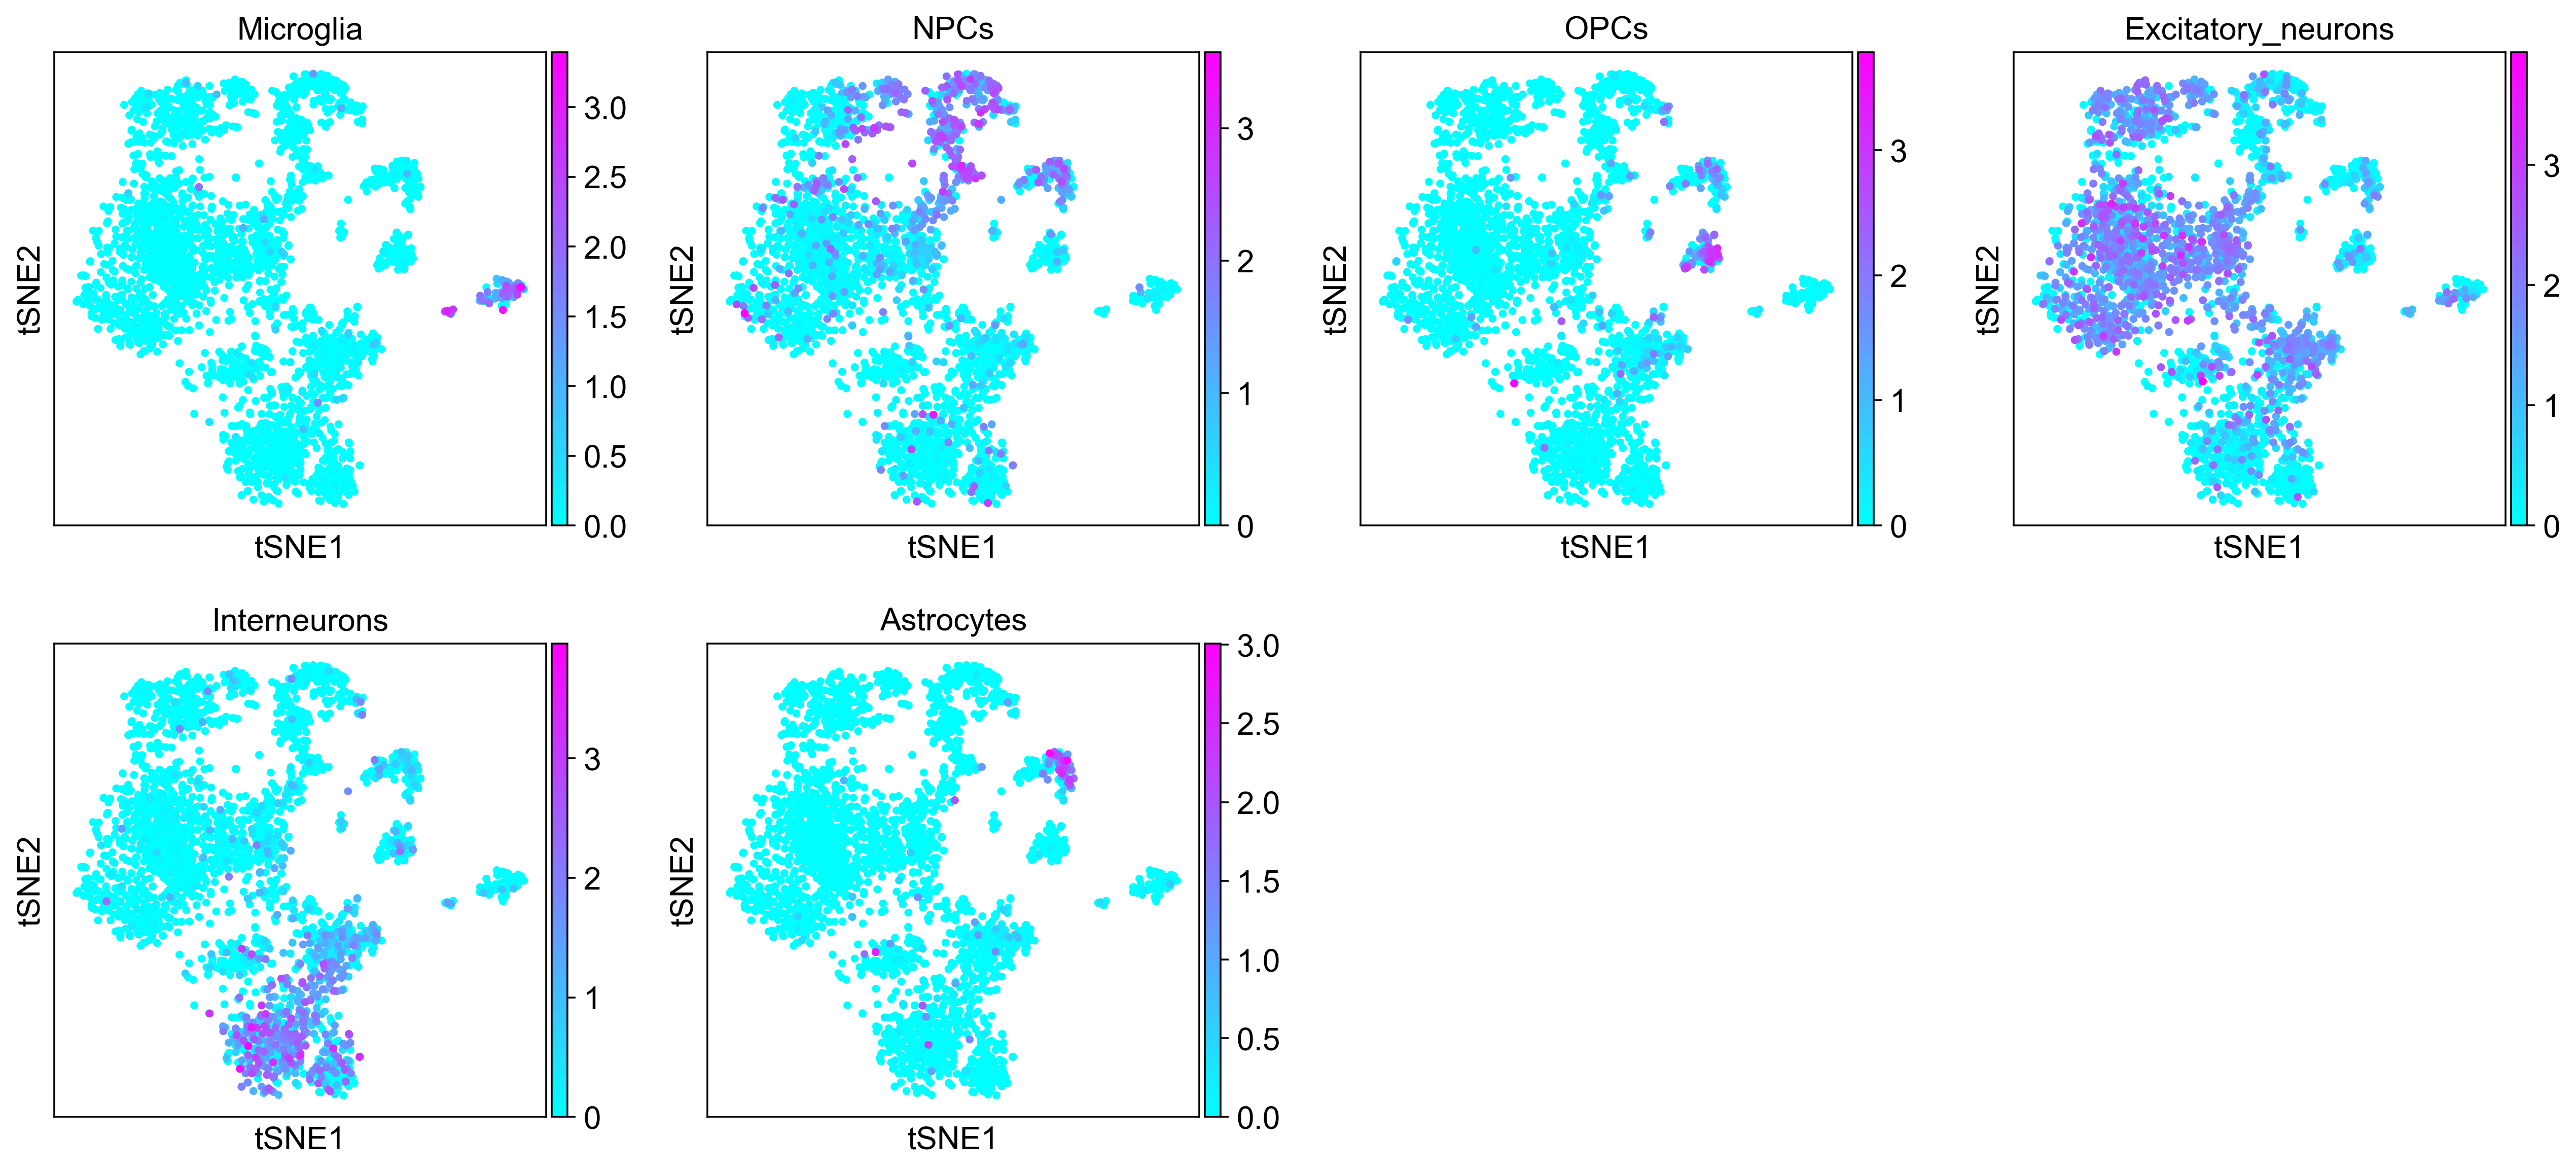

In [141]:
genes = ["PTPRC", "PAX6", "PMP2", "NEUROD2", "GAD1", "AQP4"]
titles = ["Microglia", "NPCs", "OPCs", "Excitatory_neurons", "Interneurons", "Astrocytes"]
sc.pl.tsne(adata, color=genes, title=titles, color_map="cool")

In [113]:
adata.var["gene"] = adata.var.index

In [117]:
adata.var[adata.var["gene"]=="PTPRC"]

,n_cells,highly_variable,means,dispersions,dispersions_norm,gene
PTPRC,228,True,0.14319,2.256677,1.353098,PTPRC


(array([2.189e+03, 4.200e+01, 1.900e+01, 1.200e+01, 1.000e+01, 6.000e+00,
        3.000e+00, 3.000e+00, 5.000e+00, 3.000e+00, 5.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 4.000e+00, 3.000e+00, 6.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 3.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 3.000e+00, 3.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

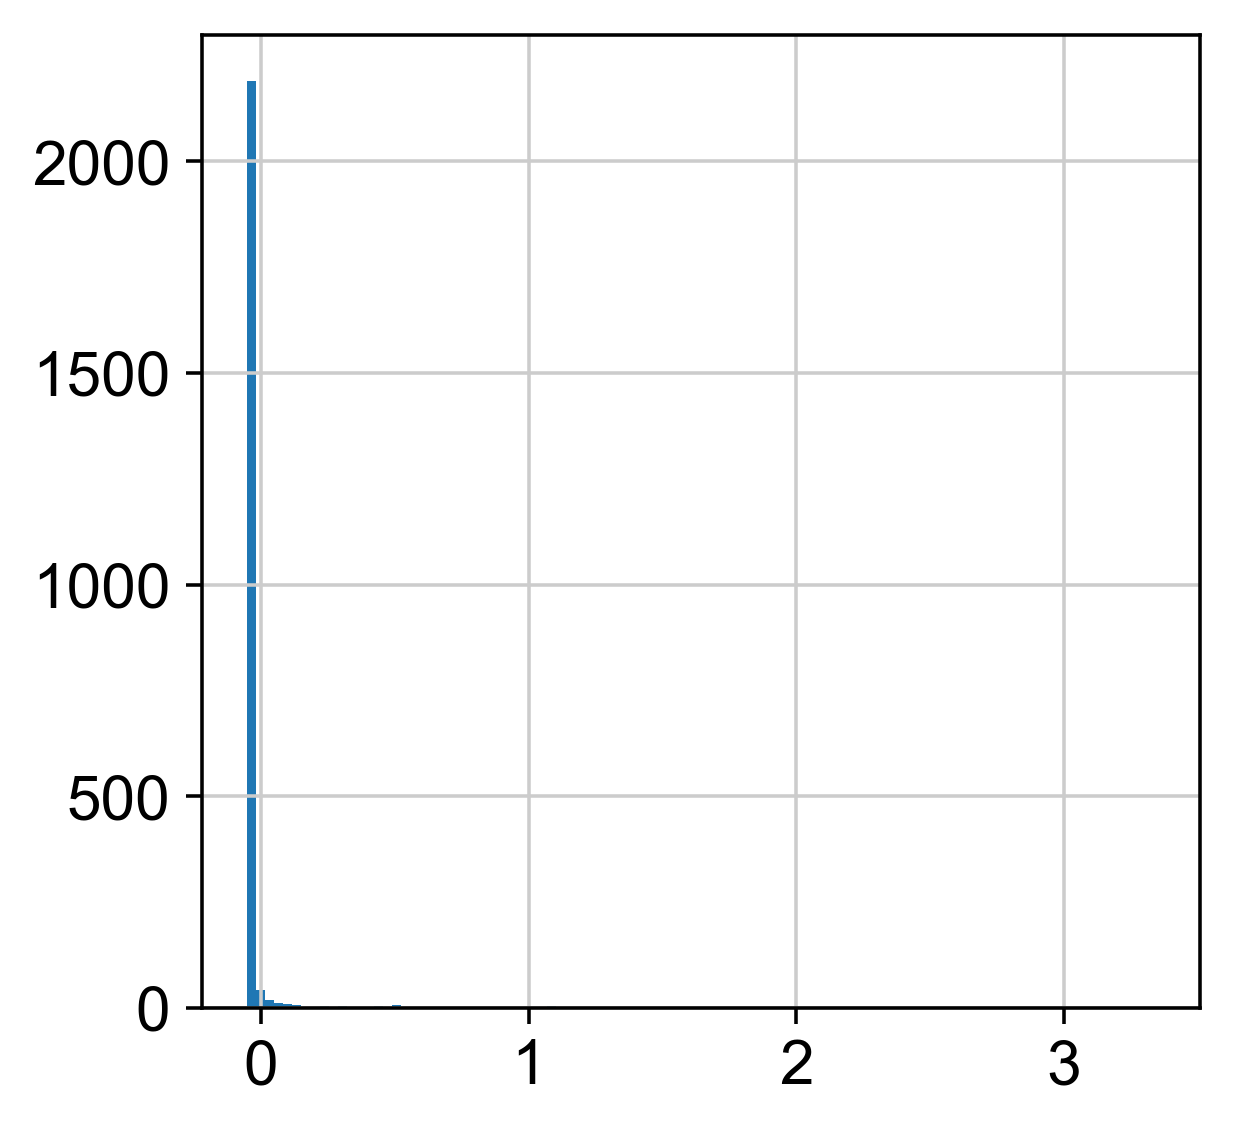

In [130]:
plt.hist(list(adata[:,"PTPRC"].X), bins=100)
#adata[:, "PTPRC"].X.shape

[autoreload of methods2final failed: Traceback (most recent call last):
  File "/Users/jiayao/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 244, in check
    superreload(m, reload, self.old_objects)
  File "/Users/jiayao/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 376, in superreload
    module = reload(module)
  File "/Users/jiayao/anaconda3/lib/python3.7/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/jiayao/anaconda3/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 630, in _exec
  File "<frozen importlib._bootstrap_external>", line 728, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/jiayao/Work/GitRepos/Methods2Final/src/methods2final.py", line 10, in <module>
    import magic
ModuleNotFoundError: No module named 'magic'
]


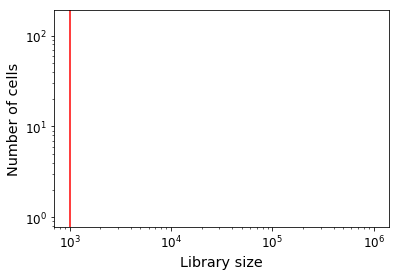

In [57]:
exp_mat_f = scprep.filter.filter_empty_cells(exp_mat)
exp_mat_f = scprep.filter.filter_empty_genes(exp_mat_f)
cutoff = 1000
scprep.plot.plot_library_size(exp_mat_f, cutoff=cutoff)
exp_mat_f = scprep.filter.filter_library_size(exp_mat_f, cutoff=cutoff)
exp_mat_f = scprep.filter.filter_rare_genes(exp_mat_f, cutoff=1, min_cells=10)

In [58]:
exp_mat_f.head()

,0,1,2,3,4,5,6,8,11,12,...,24143,24144,24145,24146,24147,24148,24149,24150,24151,24152
GW08_PFC1_sc1,4.54,0.0,0.0,4.54,0.00,0.0,0.0,4.54,68.10,95.34,...,4.54,4.54,0.0,0.00,45.4,0.0,4.54,0.00,0.0,0.0
GW08_PFC1_sc2,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,270.63,0.00,...,0.00,81.19,0.0,0.00,0.0,0.0,108.25,0.00,0.0,0.0
GW08_PFC1_sc3,0.00,0.0,0.0,8.87,0.00,0.0,0.0,0.00,97.62,0.00,...,124.25,0.00,0.0,0.00,0.0,0.0,8.87,124.25,0.0,35.5
GW08_PFC1_sc4,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,0.00,...,0.00,0.00,0.0,189.05,0.0,0.0,0.00,0.00,0.0,0.0
GW08_PFC1_sc5,0.00,0.0,0.0,872.68,2.19,0.0,0.0,0.00,135.61,0.00,...,2.19,461.49,0.0,0.00,0.0,0.0,0.00,65.62,0.0,0.0


In [34]:
exp_mat_norm = scprep.transform.log(exp_mat_f, pseudocount=1, base=10)

In [30]:
cells = [x.split('_') for x in df.columns.values[1:]]
time_points = list(set([x[0] for x in cells]))
print(time_points)

['GW10', 'GW12', 'GW13', 'GW23', 'GW08', 'GW26', 'GW16', 'GW09', 'GW19']


In [55]:
X_embedded = TSNE(n_components=2).fit_transform(exp_mat_f)
X_embedded.shape

(2392, 2)

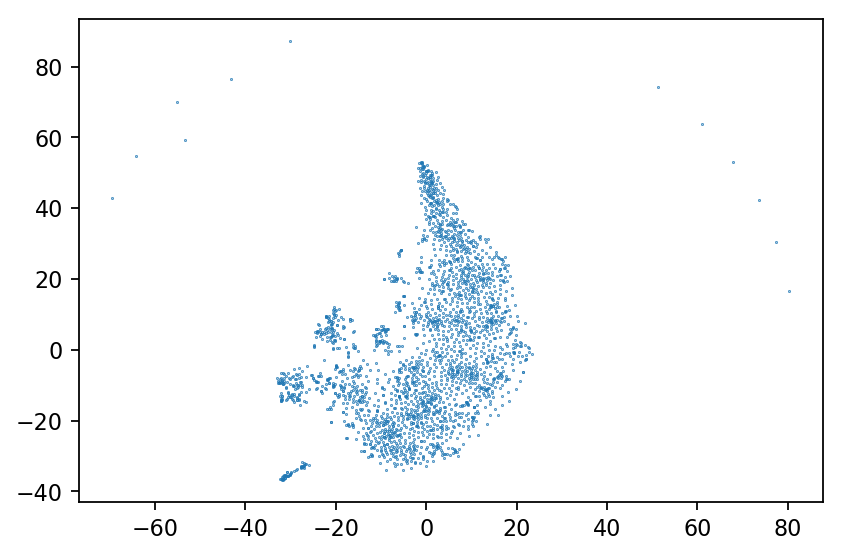

In [56]:
plt.figure(dpi=160)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], cmap=plt.cm.Spectral, s=0.1)

In [53]:
pca = PCA(n_components=2)
pca.fit(exp_mat_f)
Y = pca.transform(exp_mat_f)

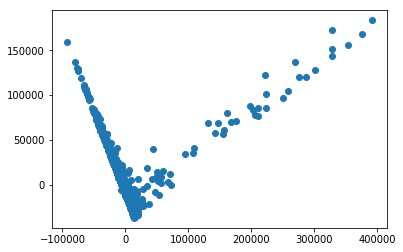

In [54]:
plt.scatter(Y[:, 0], Y[:, 1])
plt.show()

In [45]:
magic_operator = magic.MAGIC()
X_magic = magic_operator.fit_transform(exp_mat_norm, genes="pca_only")
plt.scatter(X_magic["PC1"], X_magic["PC2"], c=X_magic["PC3"], s=1, cmap='inferno')
plt.show()

NameError: name 'magic' is not defined